# <font color=darkcyan> Multivariate linear regression - Kernel regression </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

A function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a positive semi-definite kernel if and only if it is symmetric and if for all $n\geqslant 1$, $(x_1,\ldots,x_n)\in(\mathbb{R}^d)^n$ and all $(a_1,\ldots,a_n)\in\mathbb{R}^n$,
$$
\sum_{1\leqslant i,j\leqslant n}a_ia_jk(x_i,x_j) \geqslant 0\,.
$$

The following functions, defined on $\mathbb{R}^d\times\mathbb{R}^d$, are positive semi-definite kernels:

$$
k:(x,y)\mapsto x^Ty \quad\mathrm{and}\quad k:(x,y)\mapsto \mathrm{exp}\left(-\|x-y\|^2/(2\sigma^2\right)\,,\; \sigma>0\,.
$$


Let $\mathcal{F}$ be a Hilbert space of functions $f:\mathbb{R}^d\to\mathbb{R}$. A symmetric function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a reproducing kernel of $\mathcal{F}$ if and only if:

1. for all $x\in\mathbb{R}^d$, $k(x,\cdot)\in\mathcal{F}$ ; 

2. for all $x\in\mathbb{R}^d$ and all $f\in\mathcal{F}$, $\langle f; k(x,\cdot)\rangle_\mathcal{F} = f(x)$ . 

The space $\mathcal{F}$ is said to be a reproducing kernel Hilbert space with kernel $k$.



Let $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ be a positive definite kernel and $\mathcal{F}$ the RKHS with kernel $k$. Then, 

$$
\widehat f^n_{\mathcal{F}} \in \underset{f\in\mathcal{F}}{\mathrm{min}}\;\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2 + \lambda\|f\|_\mathcal{F}^2\,,
$$

where $\|f\|^2_\mathcal{F} = \langle f\,;\, f\rangle_\mathcal{F}$, is given by $\widehat f^n_{\mathcal{F}} : x \mapsto \sum_{i=1}^n \widehat \alpha_i k(X_i,x)$, where

$$
\widehat\alpha \in \underset{\alpha \in (\mathbb{R}^d)^n}{\mathrm{argmin}}\;\left\{\frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \sum_{1\leqslant i,j \leqslant n}\alpha_i \alpha_j k(X_i,X_j) = \frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right\}\,,
$$

where for all $1\leqslant i,j\leqslant n$, $K_{i,j} = k(X_i,X_j)$.

In practice, once the matrix $K$ is built, kernel ridge regression boils down to solving this optimization problem to obtain $\widehat \alpha$. Then, the estimated function $\widehat f^n_{\mathcal{F}}$ is a mixture of kernels evaluated at each data points with weights given by $\alpha$.

<font color=darkred> Provide the value of $\widehat \alpha$ as a function of $n$, $\lambda$, $K$ and  $Y$.</font>

It is enough to follow the exact same steps as in the standard linear setting
$$
\nabla \left(\frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right) = \frac{2}{n}K^TK\alpha - \frac{2}{n}K^TY +  2\lambda K\alpha = 2\left\{\left(\frac{1}{n}K^TK + \lambda K\right)\alpha - \frac{1}{n}K^TY\right\}\,.
$$

Therefore, using that $K$ is symmetric,

$$
\widehat \alpha = \left(K^TK + \lambda n I_n\right)^{-1}Y\,.
$$

#### Import data

In [2]:
import pandas as pd

Data frames can be imported using pandas. This provides two-dimensional and heterogeneous tabular data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

<font color=darkred>
    
Import data in the file BRinf using ``read_csv``, display the first rows with ``head`` and the shape of the dataframe using ``shape``.
</font>

In [3]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('BRinf.txt')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [4]:
# number of observations, number of variables
df.shape

(156, 93)

In [5]:
X = df.iloc[:,2:]
Y = df.iloc[:,1] 

<font color=darkred>
    
Use the ``StandardScaler`` of sklearn to preprocess the input variables.
</font>

``StandardScaler`` standardizes the input variables by removing the mean and scaling to unit variance.
We will not analyze closely standardization in this course. However, it is often very useful (even mandatory in some cases) for the stability of learning procedures.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [7]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)
np.shape(X)

(156, 91)

<font color=darkred>
    
Divide the input data ``X`` and observations ``Y`` into training and test sets using the ``train_test_split`` method. This method randomly splits arrays or matrices into training and test subsets. It allows to train several times a model with different training set and analyze the variability of the performance on the test set.
</font>

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
np.shape(X_train)

(140, 91)

#### Kernel Regression from scractch

<font color=darkred>

Write a ``linear_kernel`` function with the arguments two vectors ``x`` and ``y``, which returns the result of the linear kernel function defined as $k:(x,y)\mapsto x^Ty$.
</font>

In [10]:
def linear_kernel(x, y):
    return x.T @ y

<font color=darkred>

Write a ``rbf_kernel`` function with the arguments two vectors ``x`` and ``y`` and a scalar ``sigma``, which returns the result of the radial basis function (RBF) kernel defined as $k:(x,y)\mapsto \mathrm{exp}\left(-\|x-y\|^2/(2\sigma^2\right)$.
</font>

In [11]:
def rbf_kernel(x, y, sigma):
    return np.exp(-(np.linalg.norm(x - y)**2) / 2*sigma**2)

<font color=darkred>

Write a ``kernel_ridge_regression`` function with arguments the data ``X`` and ``y``, the kernel matrix ``K`` and a penalty parameter ``$\lambda$``. The function returns the parameter estimate $\widehat \alpha$.
</font>

In [12]:
def kernel_ridge_regression(X, y, K, lambda_):
    n = X.shape[0]    
    alpha = np.linalg.inv(K + lambda_*n*np.identity(n)) @ y
    return alpha

In [13]:
# Compute Kernel matrix using "linear_kernel"
n = X_train.shape[0]
K = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K[i, j] = linear_kernel(X_train[i], X_train[j])

# Compute alpha
lambda_ = 1
alpha = kernel_ridge_regression(X_train, Y_train, K, lambda_)
alpha

array([0.00378056, 0.00522033, 0.00331312, 0.00394071, 0.00358343,
       0.00307711, 0.00386792, 0.00339301, 0.00390089, 0.00441911,
       0.00303297, 0.00407262, 0.00416263, 0.00473699, 0.00323906,
       0.00459146, 0.00374383, 0.00456391, 0.00390883, 0.00296285,
       0.00340431, 0.00262594, 0.00332522, 0.00391715, 0.004065  ,
       0.00370318, 0.00185676, 0.00314839, 0.00439152, 0.00449014,
       0.00335773, 0.00211146, 0.00229774, 0.00350784, 0.00413839,
       0.00329995, 0.00292971, 0.00381597, 0.00449618, 0.00294449,
       0.00322546, 0.00349106, 0.00465067, 0.00331577, 0.00147714,
       0.00306744, 0.00405388, 0.00358804, 0.00243886, 0.00344163,
       0.00365808, 0.002895  , 0.00386055, 0.00060402, 0.00270497,
       0.0036429 , 0.00363385, 0.00198555, 0.00309954, 0.00304353,
       0.00536205, 0.00382068, 0.00423983, 0.0038823 , 0.00321351,
       0.00443977, 0.00392246, 0.00482067, 0.0033741 , 0.00415216,
       0.00334883, 0.00411616, 0.00333127, 0.00334469, 0.00409

<font color=darkred>
    Run the algorithm with several values of $\lambda$ using X_train and Y_train and compute MSE obtained on the test set.
    </font>

In [14]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

# Compute the kernel matrix between test and training data
K_test_train = np.zeros((n_test, n_train))
for i in range(n_test):
    for j in range(n_train):
        K_test_train[i, j] = linear_kernel(X_test[i], X_train[j])

# Compute predictions
y_pred = K_test_train @ alpha

# Compute MSE
mse = mean_squared_error(Y_test, y_pred)
print(f"MSE on test set: {mse}")

MSE on test set: 0.34321224181963583


#### Kernel Regression with Sklearn

In [15]:
from sklearn.kernel_ridge import KernelRidge

<font color=darkred>
    
Fit a ``KernelRidge`` from sklearn to train a kernel regression model, display the parameter estimate $\widehat \alpha$ and compute the MSE obtained on the test set.
</font>

In [16]:
# Fit the model
kernel_ridge_regressor = KernelRidge(kernel='linear')
kernel_ridge_regressor.fit(X_train, Y_train)

KernelRidge()

In [17]:
# The parameter estimate 
kernel_ridge_regressor.dual_coef_

array([0.29593701, 0.63257102, 0.52874477, 0.51181956, 0.3479523 ,
       0.39997814, 0.35085243, 0.26218377, 0.54942658, 0.49887792,
       0.41351995, 0.39668585, 0.68965259, 0.44831677, 0.55588537,
       0.15347136, 0.54264129, 0.59217953, 0.52135209, 0.28751295,
       0.3170865 , 0.61974962, 0.57642648, 0.33894168, 0.5714393 ,
       0.49894246, 0.30042264, 0.37955845, 0.46871339, 0.62568188,
       0.44955599, 0.47609387, 0.48897351, 0.40914906, 0.44502517,
       0.48864873, 0.60546968, 0.35883562, 0.41477992, 0.45446815,
       0.31066067, 0.33406493, 0.63400426, 0.38341444, 0.58764192,
       0.21581962, 0.49287119, 0.66156992, 0.28842273, 0.41265203,
       0.47432348, 0.23562219, 0.56154547, 0.44751097, 0.29151407,
       0.55025142, 0.53161925, 0.32157382, 0.24744179, 0.06282498,
       0.56683778, 0.41199626, 0.43191423, 0.63203716, 0.31872794,
       0.42888063, 0.62208177, 0.67935764, 0.13790528, 0.53145347,
       0.63145451, 0.54990564, 0.46431816, 0.50391461, 0.65746

In [18]:
# Compute MSE
y_pred = kernel_ridge_regressor.predict(X_test)
mean_squared_error(Y_test, y_pred)

0.990840991251101

#### Cross Validation

<font color=darkred>
    
Implement a grid search from scratch for the given ``KernelRidge`` model with radial basis function (RBF) kernel and hyperparameter ``alpha``. Create a new training dataset (X_train, Y_train) and a validation dataset (X_val, Y_val) using the actual (X_train, Y_train) datasets. Write a function that performs grid search to find the best value of ``alpha`` and displays the best hyperparameter along with the corresponding validation MSE.
</font>

In [19]:
model = KernelRidge(kernel='rbf', gamma=0.1)

# Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)


# Hyperparameter grid for alpha
alphas = [1e0, 0.1, 1e-2, 1e-3]

best_alpha = None
best_score = float('inf')

for alpha in alphas:
    model.set_params(alpha=alpha)

    model.fit(X_train, Y_train)
    Y_val_pred = model.predict(X_val)
    mse = mean_squared_error(Y_val, Y_val_pred)

    # Check if this alpha is the best so far
    if mse < best_score:
        best_score = mse
        best_alpha = alpha

# Fit the model with the best alpha on the full training set
model.set_params(alpha=best_alpha)
model.fit(X_train, Y_train)

print("Best alpha:", best_alpha)
print("Validation MSE with best alpha:", best_score)

Best alpha: 0.001
Validation MSE with best alpha: 0.630048439407071


<font color=darkred>
    
Implement a grid search using either ``GridSearchCV`` or ``RandomizedSearchCV`` for the given ``KernelRidge`` model with a radial basis function (RBF) kernel and hyperparameters ``alpha`` and ``gamma``. Display the optimal hyperparameters along with the corresponding validation MSE.
    
</font>

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [21]:
model = KernelRidge(kernel='rbf', gamma=0.1)
param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
            "gamma": np.logspace(-2, 2, 5)}

kernel_ridge_regressor = GridSearchCV(model, cv=5, param_grid=param_grid)
kernel_ridge_regressor.fit(X_train, Y_train)

print("Best parameters:", kernel_ridge_regressor.best_params_)
print("Best cross-validated score:", kernel_ridge_regressor.best_score_)

Best parameters: {'alpha': 0.001, 'gamma': 0.01}
Best cross-validated score: 0.15044172089988797


#### Ridge vs Lasso

In [22]:
from sklearn.linear_model import Lasso, Ridge

In [23]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

<font color=darkred>
Create a np array with several values of the penalty parameter (called $\alpha$ in Python)
</font>

In [24]:
n_alphas = 100
alphas = np.logspace(-10, 3, n_alphas)

<font color=darkred>
Use the ``fit`` function of sklearn to fit a Lasso and Ridge model with for each value of $\alpha$. 
    
Store the estimated parameter, the number of zeros in the estimated parameter and the MSE on the test set after each training.
</font>

In [25]:
lasso = Lasso(max_iter=10000)  
coefs = []
nb_zeros = []
rmse = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    coefs.append(lasso.coef_)
    nb_zeros.append(np.count_nonzero(lasso.coef_==0))
    y_hat = lasso.predict(X_test)
    rmse.append(mean_squared_error(y_hat,Y_test.values))


ridge = Ridge()
coefs_ridge = []
nb_zeros_ridge = []
rmse_ridge = []
for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, Y_train)
    coefs_ridge.append(ridge.coef_)
    nb_zeros_ridge.append(np.count_nonzero(ridge.coef_==0))
    y_hat = ridge.predict(X_test)
    rmse_ridge.append(mean_squared_error(y_hat,Y_test.values))

<font color=darkred>
Display the estimated parameters as a function of the penalty parameter.
</font>

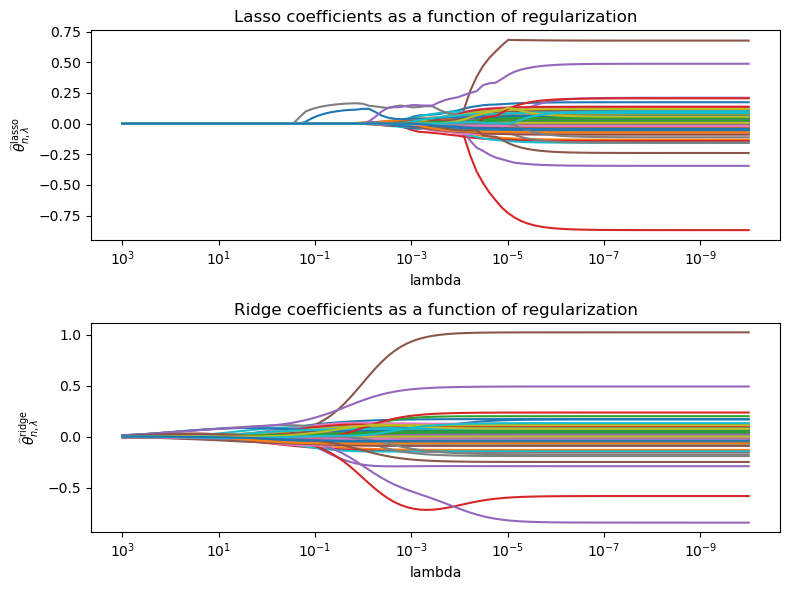

In [26]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, coefs)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
ax1.set_xlabel("lambda")
ax1.set_ylabel(r'$\widehat\theta^{\mathrm{lasso}}_{n,\lambda}$')
ax1.set_title("Lasso coefficients as a function of regularization")
ax1.axis("tight")

ax2.plot(alphas, coefs_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel(r'$\widehat\theta^{\mathrm{ridge}}_{n,\lambda}$')
ax2.set_title("Ridge coefficients as a function of regularization")
ax2.axis("tight")

plt.tight_layout()
plt.show()

<font color=darkred>
Display the number of zero coefficients of the estimated parameter as a function of the penalty parameter.
</font>

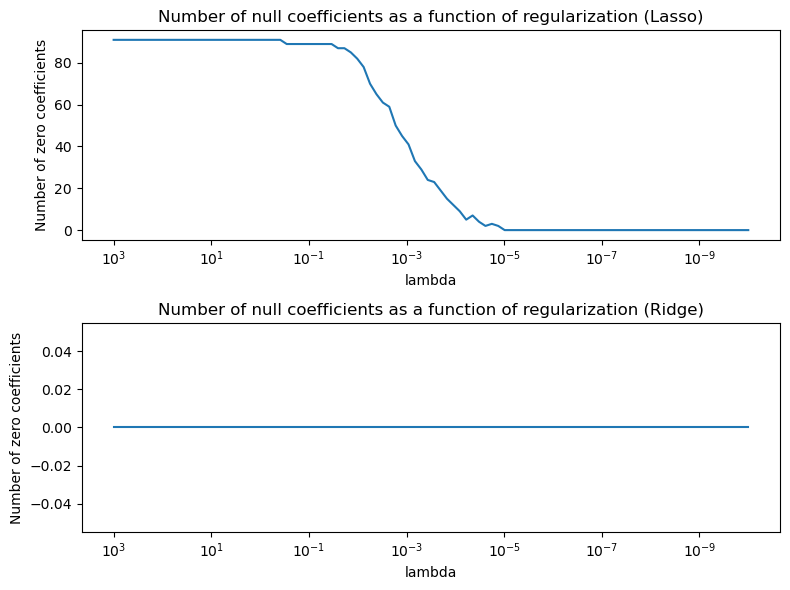

In [27]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, nb_zeros)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  
ax1.set_xlabel("lambda")
ax1.set_ylabel('Number of zero coefficients')
ax1.set_title("Number of null coefficients as a function of regularization (Lasso)")
ax1.axis("tight")

ax2.plot(alphas, nb_zeros_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel('Number of zero coefficients')
ax2.set_title("Number of null coefficients as a function of regularization (Ridge)")
ax2.axis("tight")

plt.tight_layout()
plt.show()

<font color=darkred>
Display the MSE on the test set as a function of the penalty parameter.
</font>

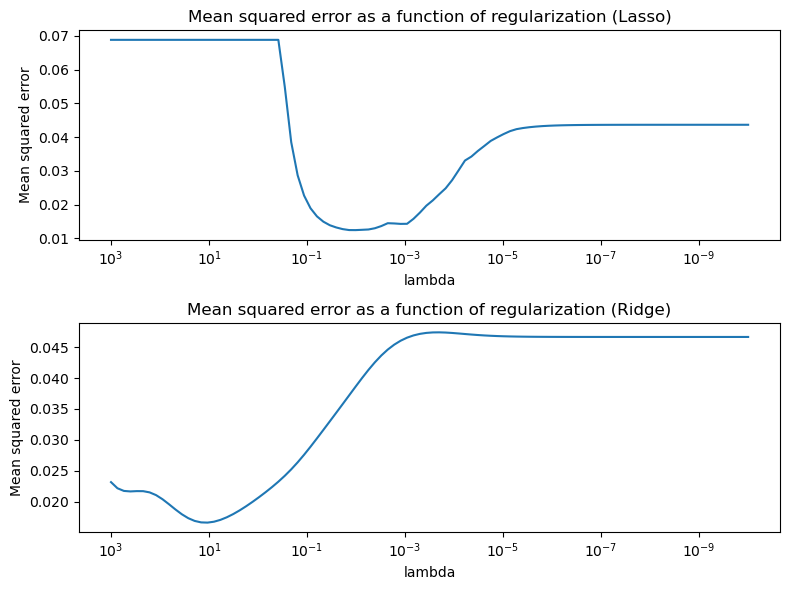

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

ax1.plot(alphas, rmse)
ax1.set_xscale("log")
ax1.set_xlim(ax1.get_xlim()[::-1])  # reverse axis
ax1.set_xlabel("lambda")
ax1.set_ylabel('Mean squared error')
ax1.set_title("Mean squared error as a function of regularization (Lasso)")
ax1.axis("tight")

ax2.plot(alphas, rmse_ridge)
ax2.set_xscale("log")
ax2.set_xlim(ax2.get_xlim()[::-1])
ax2.set_xlabel("lambda")
ax2.set_ylabel('Mean squared error')
ax2.set_title("Mean squared error as a function of regularization (Ridge)")
ax2.axis("tight")

plt.tight_layout()
plt.show()